# Jacob Pan, Jacobfp2, CHBE 494 HW 6

## Question 1

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt


class Chemical(): 
    
    def __init__(self, name = '', param = []): 
        self.name = name
        self.param = param
    
    def __str__(self):
        return "Chemical: " + str(self.name)
    
    def vapor_pressure(self, T):
        self.T = T
        pressure = 10**(self.param[0] - self.param[1] / (self.param[2] + T))
        return pressure
            
    def boiling_point(self, P = 1.01):
        chemical = lambda T: P - 10**(self.param[0] - self.param[1] / (self.param[2] + T))
        sol1 = root(chemical,300)
        return sol1.x[0]
    
    
    def __add__(self, other):
        chemical = Chemical(self.name, self.param)
        chemicalTwo = Chemical(other.name, other.param)
        total = "The mixture contains: " + self.name + " & " + other.name
        return Mixture(chemical,chemicalTwo,total)
    
benzene = Chemical('benzene', [3.98523, 1184.24, -55.578])
print(benzene.vapor_pressure(300))
print(benzene.boiling_point())
print(benzene.boiling_point(2))
print(benzene)

0.1380915019709233
353.0578246312074
377.0154894430924
Chemical: benzene


## Question 2

The mixture contains: benzene & toluene

365.08731456855406
390.1418819739873

371.77437585050967
396.6883489417369



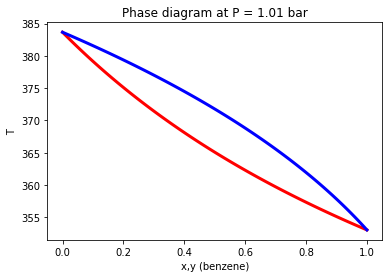

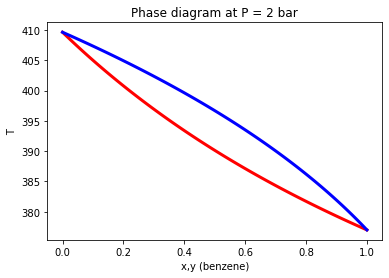

In [2]:
class Mixture():
    
    def __init__(self, chemical, chemicalTwo, total):
        self.param1 = chemical.param
        self.param2 = chemicalTwo.param
        self.total = total
    
    def __str__(self):
        return str(self.total)
        
       
    def bubble_point(self, x, P = 1.01):
        solRauolt = root(lambda T: x * 10**(self.param1[0] - self.param1[1] / (self.param1[2] + T)) + (1-x) * 10 ** (self.param2[0] - self.param2[1] / (self.param2[2] + T)) - P, 350)
        return solRauolt.x[0]
        
        
    def dew_point(self, y, P = 1.01):
        solDew = root(lambda T: y * P/ 10**(self.param1[0] - self.param1[1] / (self.param1[2] + T)) + (1-y)* P/ 10 ** (self.param2[0] - self.param2[1] / (self.param2[2] + T)) - 1, 250)
        return solDew.x[0]
        
        
    def diagram(self, P = 1.01):
        x = np.linspace(0,1,100)
        y = np.linspace(0,1,100)
        Tx = np.zeros(100)
        Ty = np.zeros(100)

    #Bubble Point plot
        for i in range(100):
            solRauolt = root(lambda T: x[i] * 10**(self.param1[0] - self.param1[1] / (self.param1[2] + T)) + (1-x[i]) * 10 ** (self.param2[0] - self.param2[1] / (self.param2[2] + T)) - P, 350)
            Tx[i] = solRauolt.x[0]
        plt.plot(x, Tx, color = 'r', lw = 3)
        plt.xlabel("x,y (benzene)")
        plt.ylabel("T")
    #Dew point plot
        for i in range(100):
            solDew = root(lambda T: y[i] * P/ 10**(self.param1[0] - self.param1[1] / (self.param1[2] + T)) + (1-y[i])* P/ 10 ** (self.param2[0] - self.param2[1] / (self.param2[2] + T)) - 1, 250)
            Ty[i] = solDew.x[0]
        plt.plot(x, Ty, color = 'b', lw = 3)
        plt.title("Phase diagram at P = " + str(P) + " bar")
        plt.show()
benzene = Chemical('benzene', [3.98523, 1184.24, -55.578])
toluene = Chemical('toluene', [4.05043, 1327.62, -55.525])

mixture = benzene + toluene
print(mixture)
print()

print(mixture.bubble_point(0.5))
print(mixture.bubble_point(0.5,2))
print()

print(mixture.dew_point(0.5))
print(mixture.dew_point(0.5,2))
print()

mixture.diagram()
mixture.diagram(2)

## Question 3

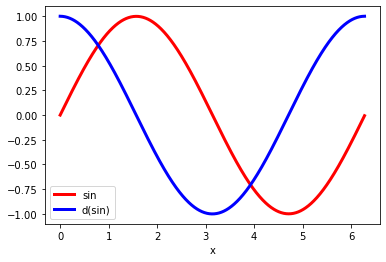

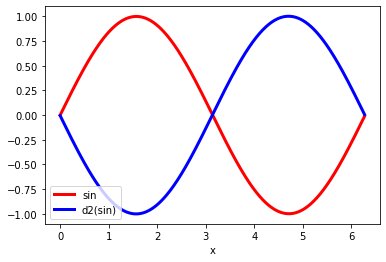

In [3]:
import numpy as np
import math

start = 0
end = 2* math.pi
n = 1000

def deriv1(step, values):
    return [(values[i + 1] - values[i]) / step for i in range(len(values) - 1)]
    
def deriv2(step, values):
    return deriv1(step, deriv1(step, values))
    
x = list(np.linspace(start, end, n))
values = [np.sin(i) for i in x]
step = (end - start) / n
plt.plot(x[:-1], values[:-1], color = 'r', lw = 3, label = 'sin')
plt.plot(x[:-1], deriv1(step,values), color = 'b', lw = 3, label = 'd(sin)')
plt.legend(loc = 'lower left')
plt.xlabel("x")

plt.show()
plt.plot(x[:-2], values[:-2], color = 'r', lw = 3, label = 'sin')
plt.plot(x[:-2], deriv2(step, values), color = 'b', lw = 3, label = 'd2(sin)')
plt.legend(loc = 'lower left')
plt.xlabel("x")
plt.show()

## Question 4

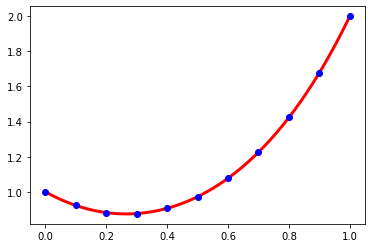

In [4]:
from numpy.polynomial.polynomial import *

p = [1,2,3,4]
pd = polyder(p)
pd2= polyder(p,2)


N = 10
xc = np.linspace(0,1,N + 1)

def myfun(p):
    eqn =0*p
    
    dp2 = polyder(p,2)
    
    eqn[0] = polyval(xc[0],p) - 1 
    
    for i in range(1,N):
        eqn[i] = polyval(xc[i],dp2) - 4*polyval(xc[i], p)
       
        
    eqn[-1] = polyval(xc[-1],p) - 2 
        
    return eqn

sol = root(myfun,np.ones(N))
p = sol.x


x = np.linspace(0,1,1000)
y = polyval(x,p)

plt.plot(x,y,lw=3,color='r')


plt.plot(xc,polyval(xc,p),'o',color='b',lw=3)


plt.show()